In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finaldata-energyconsumption/final_data.csv


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the data
data = pd.read_csv('/kaggle/input/finaldata-energyconsumption/final_data.csv')

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('Datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Ensure columns are numeric for analysis
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate the percentage of negative values in sub-metering columns
negative_percentages = (data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] < 0).mean() * 100

# Replace negative values with zero for plotting
data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].clip(lower=0)

<ipython-input-2-540d8417a3c5>:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/finaldata-energyconsumption/final_data.csv')


### Insight for Governments: 
* Identifying peak demand trends aids in creating energy-saving policies and planning infrastructure investments.

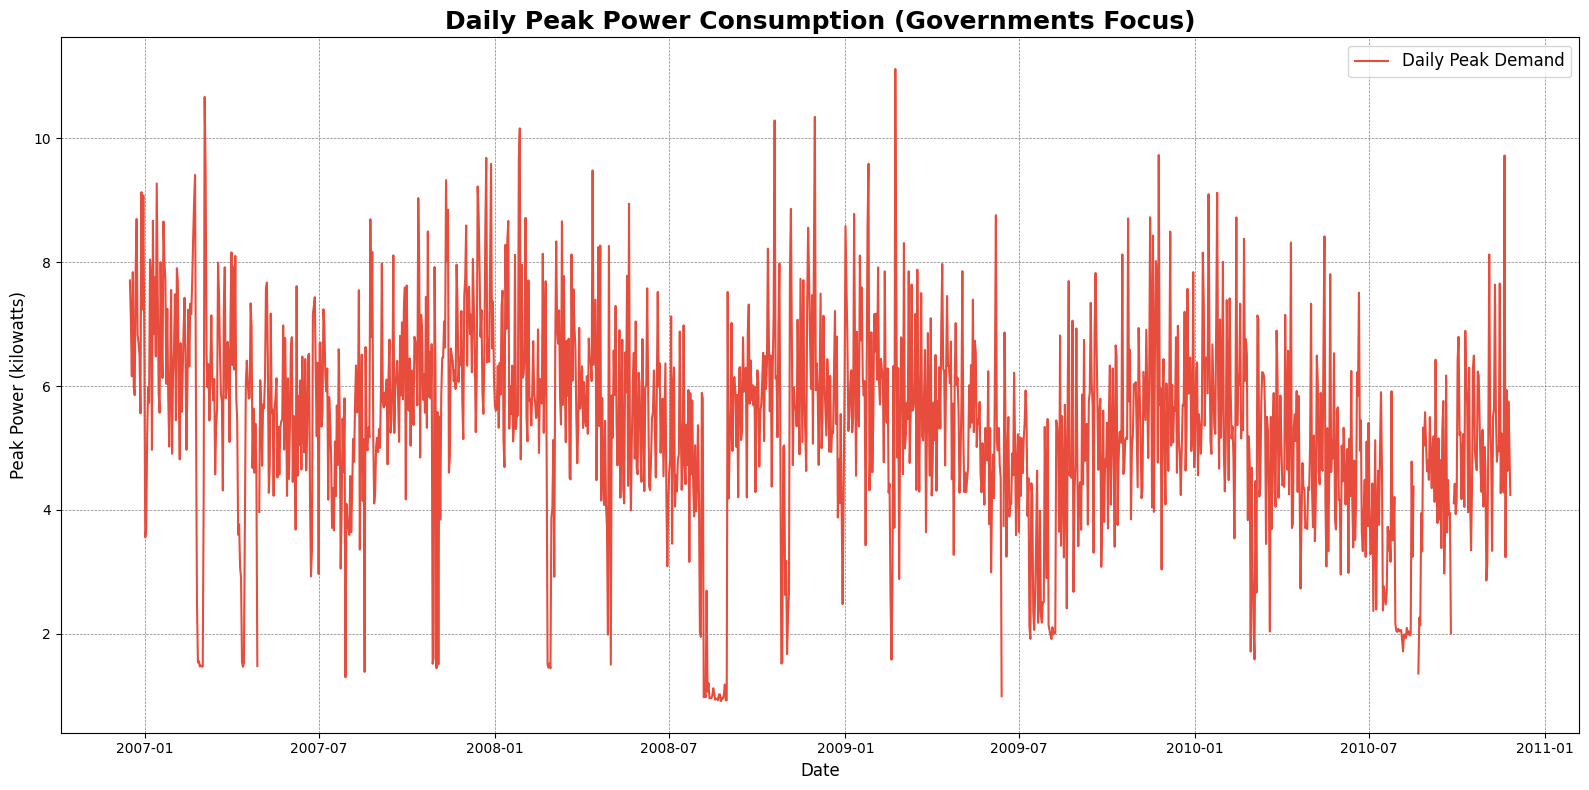

In [3]:
# 1. GOVERNMENTS: Peak Demand Analysis
daily_peak = data['Global_active_power'].resample('D').max()

plt.figure(figsize=(16, 8))
plt.plot(daily_peak, label='Daily Peak Demand', color='#e74c3c', linewidth=1.5)
plt.title('Daily Peak Power Consumption (Governments Focus)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Peak Power (kilowatts)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Insight for Consumers: 
* Visualizing monthly energy use helps consumers identify high-consumption areas and adopt energy-saving measures.


<Figure size 1600x800 with 0 Axes>

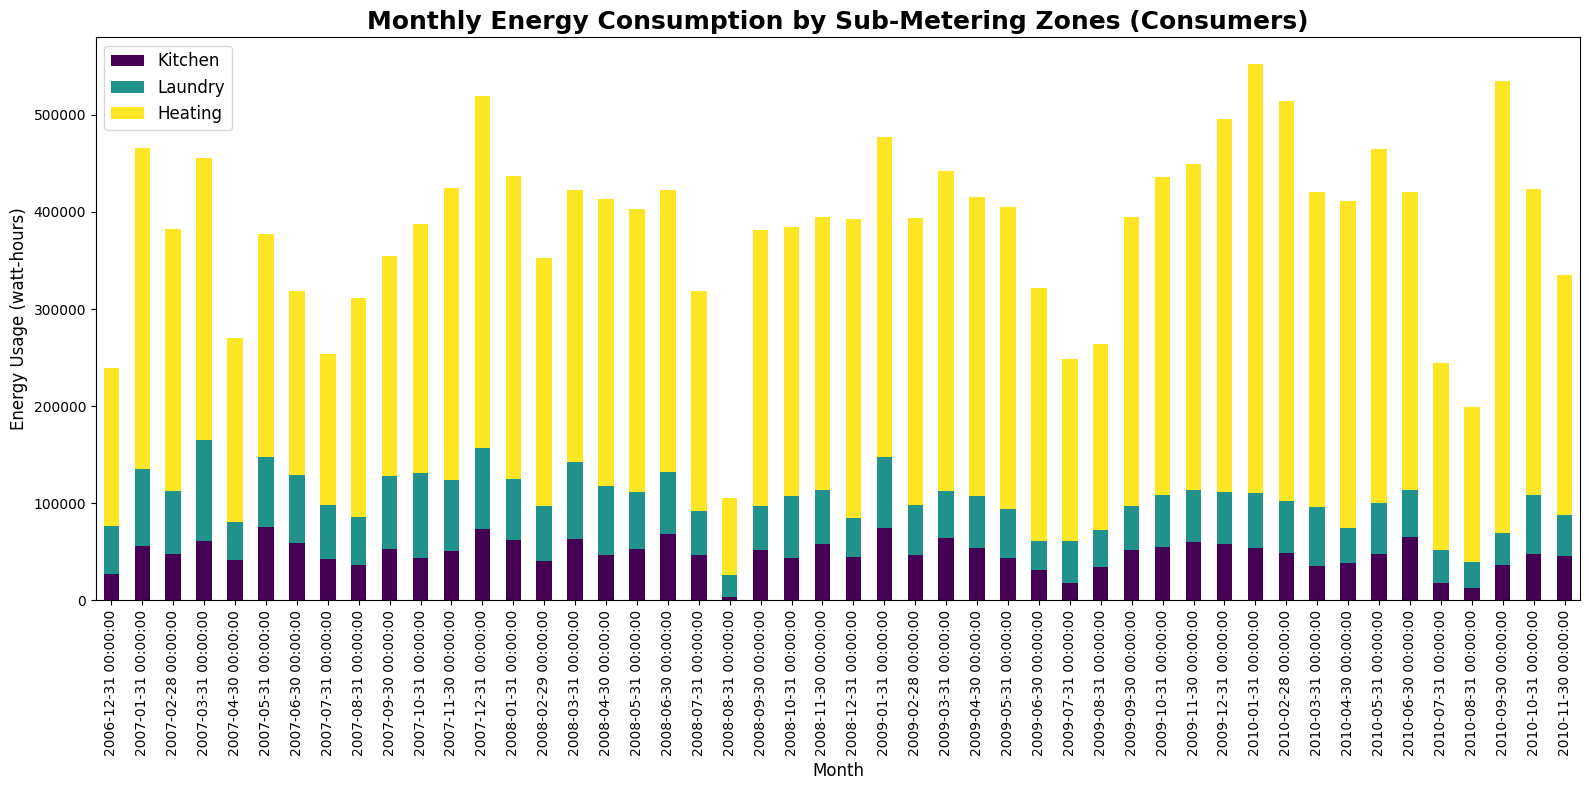

In [4]:
# 2. CONSUMERS: Sub-Metering Analysis
plt.figure(figsize=(16, 8))
data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('M').sum().plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(16, 8)
)
plt.title('Monthly Energy Consumption by Sub-Metering Zones (Consumers)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy Usage (watt-hours)', fontsize=12)
plt.legend(['Kitchen', 'Laundry', 'Heating'], fontsize=12)
plt.tight_layout()
plt.show()


### Insight for Utilities: 
* Load distribution helps utilities optimize generation and grid stability.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


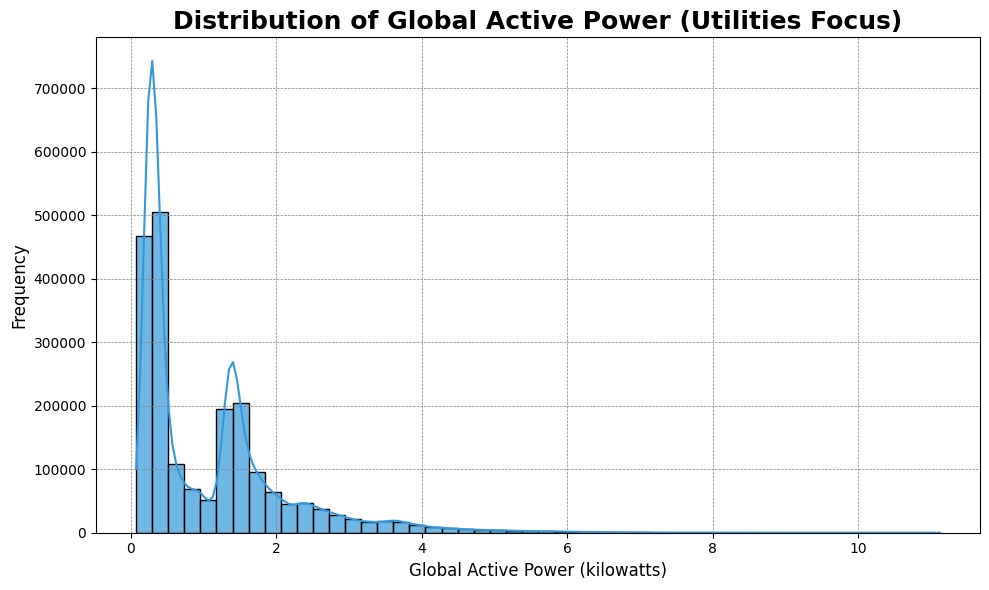

In [5]:
# 3. UTILITIES: Load Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_active_power'], bins=50, kde=True, color='#3498db', alpha=0.7)
plt.title('Distribution of Global Active Power (Utilities Focus)', fontsize=18, fontweight='bold')
plt.xlabel('Global Active Power (kilowatts)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Insight for Financial Institutions: 
* Highlighting high-consumption zones for targeted funding or investments.

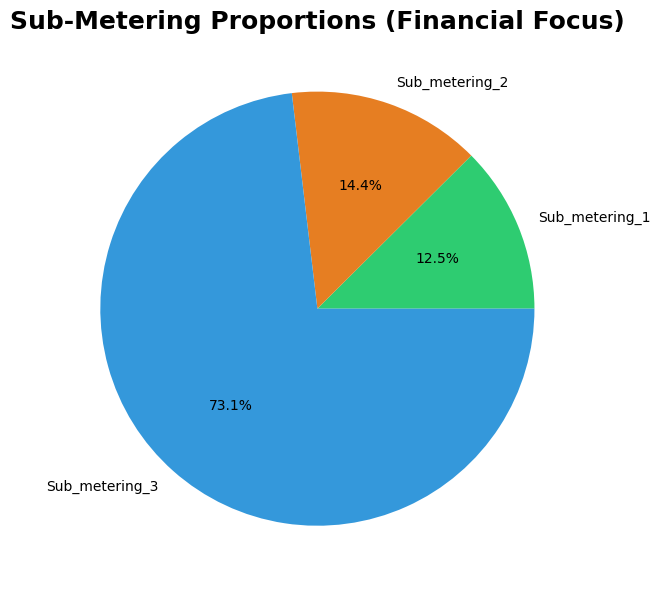

In [6]:
# 4. FINANCIAL INSTITUTIONS: ROI Analysis using Sub-Metering
sub_metering_totals = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
plt.figure(figsize=(8, 6))
sub_metering_totals.plot(kind='pie', autopct='%1.1f%%', colors=['#2ecc71', '#e67e22', '#3498db'])
plt.title('Sub-Metering Proportions (Financial Focus)', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Insight for Manufacturers/Retailers: 
* Voltage trends can influence equipment and product efficiency designs.

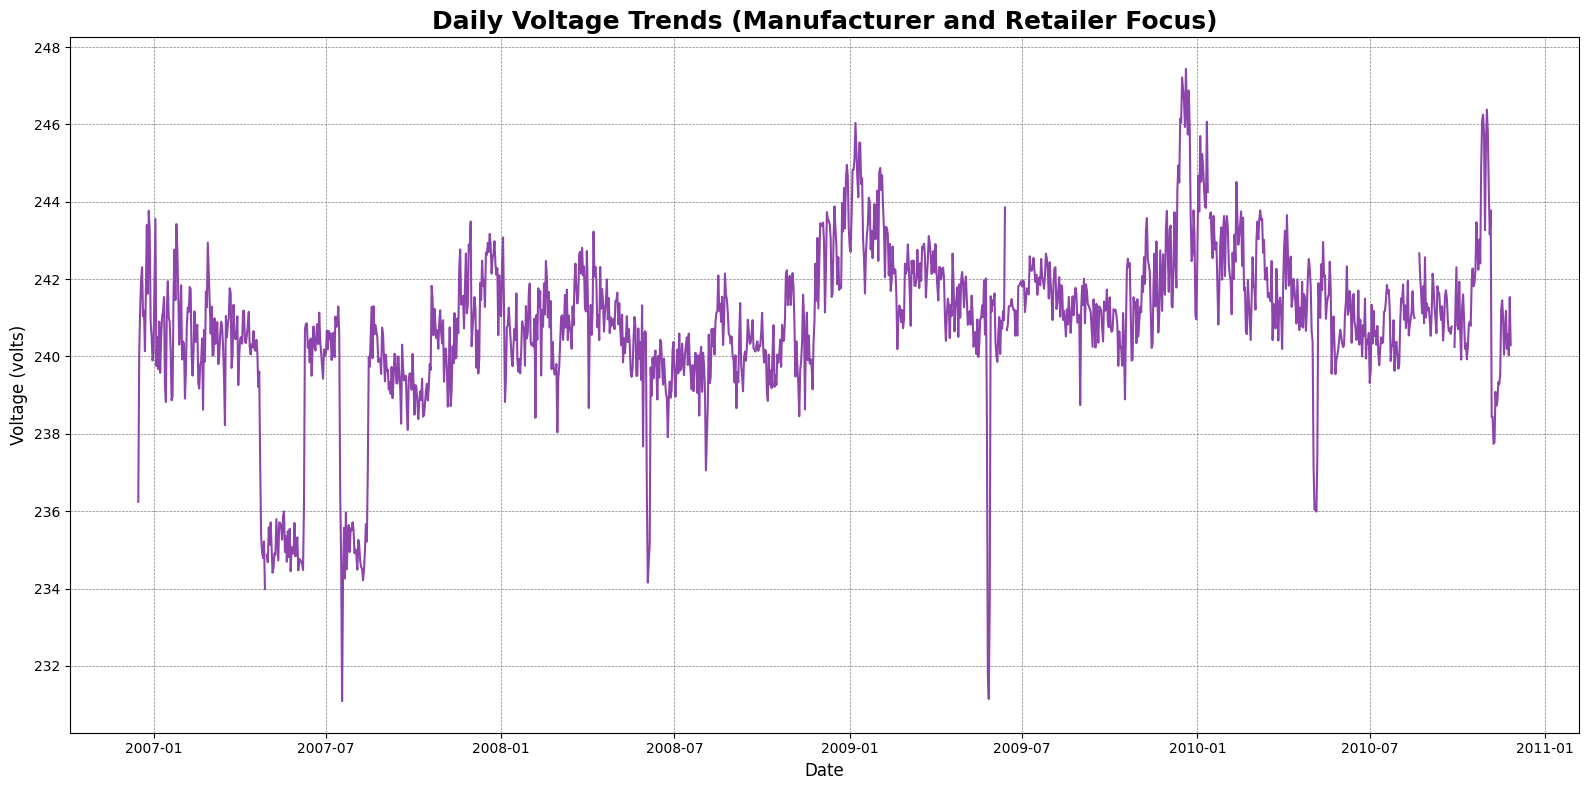

In [7]:
# 5. MANUFACTURERS AND RETAILERS: Trends in Voltage
plt.figure(figsize=(16, 8))
plt.plot(data['Voltage'].resample('D').mean(), color='#8e44ad', linewidth=1.5)
plt.title('Daily Voltage Trends (Manufacturer and Retailer Focus)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Voltage (volts)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Insight for NGOs: 
* Seasonal patterns in energy consumption can guide advocacy and educational campaigns.

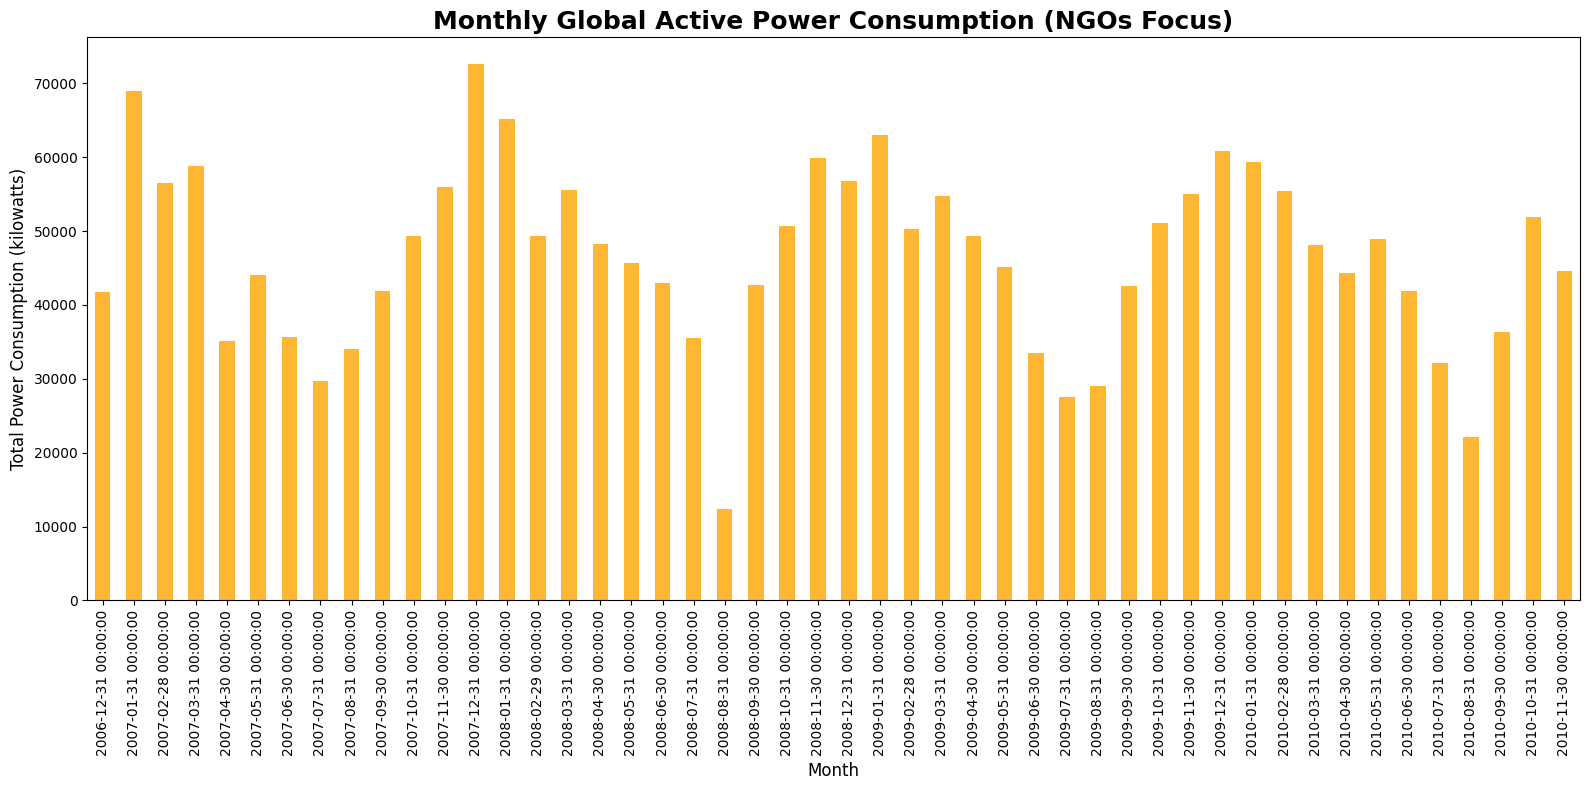

In [8]:
# 6. NON-GOVERNMENTAL ORGANIZATIONS (NGOs): Seasonal Energy Consumption
monthly_data = data['Global_active_power'].resample('M').sum()

plt.figure(figsize=(16, 8))
monthly_data.plot(kind='bar', color='#ffa500', alpha=0.8)
plt.title('Monthly Global Active Power Consumption (NGOs Focus)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Power Consumption (kilowatts)', fontsize=12)
plt.tight_layout()
plt.show()